In [23]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [24]:
# Read the pair of images
img_a  = openpiv.tools.imread( '../Data/openpiv_data/exp1_001_b.bmp' )
img_b  = openpiv.tools.imread( '../Data/openpiv_data/exp1_001_c.bmp' )

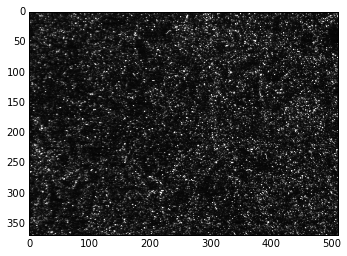

In [25]:
# Show the image in greyscale
imshow(img_a,cmap=cm.gray) 

In [26]:
window_size = 32 # pixels
overlap = 16 # pixels, i.e. 50%
dt = 1./15 # 15 Hz laser and CCD recording
# process PIV
u, v, sig2noise = \
openpiv.process.extended_search_area_piv( \
                                         img_a.astype(np.int32), img_b.astype(np.int32), \
                                         window_size=window_size,\
                                         overlap = overlap, \
                                         dt = dt, \
                                         search_area_size=2*window_size, \
                                         sig2noise_method='peak2peak' )

# get the central points of the interrogation windows
x, y = openpiv.process.get_coordinates( image_size = img_a.shape, \
                                       window_size = window_size, \
                                       overlap  = overlap )

In [27]:
# peak to peak ratio to mask errorneous vectors is about 1.1 - 1.3
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.1 )

In [28]:
# Replace outliers (masked in the previous step) using the local mean filter:
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)

In [29]:
# rescale the data from pixel/dt into mm/sec
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 1.0 )

In [30]:
# save the result if you need or show it in a plot (see below):
# openpiv.tools.save(x, y, u, v, mask, 'tutorial-part3.txt' )

# openpiv.tools.display_vector_field('tutorial-part3.txt', scale=100, width=0.0025)

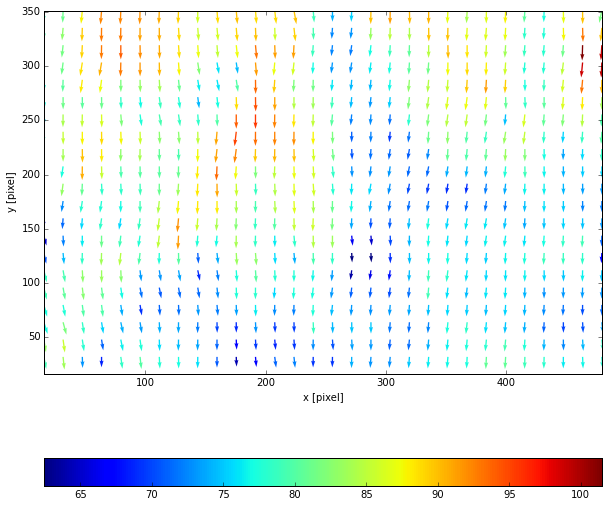

In [31]:
# Show the vectof flow field using vertical velocity for the color mapping
figure()
ax = axes()
quiver(x,y,u,v,(np.abs(v)))
axis('tight')
ax.set_aspect(.9)
f = gcf()
f.set_size_inches(10,10)
colorbar(orientation='horizontal')
xlabel('x [pixel]')
ylabel('y [pixel]')


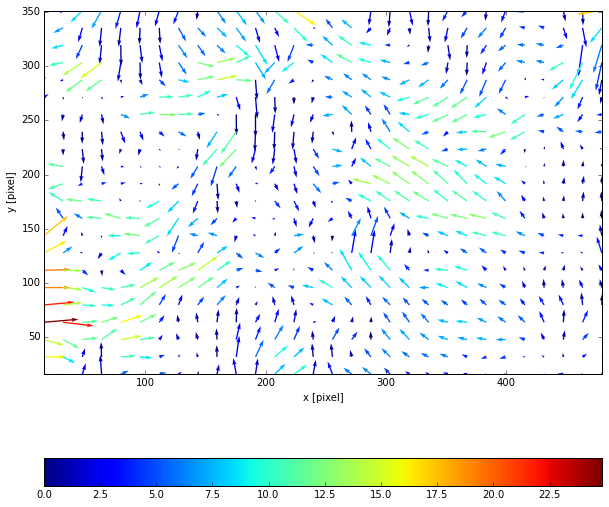

In [32]:
# Show the vectof flow field using vertical velocity for the color mapping
figure()
ax = axes()
quiver(x,y,u,v-np.mean(v.flatten()),(np.abs(u)))
axis('tight')
ax.set_aspect(.9)
f = gcf()
f.set_size_inches(10,10)
colorbar(orientation='horizontal')
xlabel('x [pixel]')
ylabel('y [pixel]')
